In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
script_dir = os.path.dirname(os.path.abspath(os.getcwd()))
file_path = os.path.join(script_dir, "raw_datasets", "storm.xlsx")
df = pd.read_excel(file_path)

In [4]:
df.shape

(2672, 46)

In [5]:
df.head()

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
0,2000-0009-IRN,No,nat-met-sto-sto,Natural,Meteorological,Storm,Storm (General),NaN,NaN,IRN,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,"[{""adm1_code"":1545,""adm1_name"":""Gilan""}]",2003-07-01,2023-09-25
1,2000-0021-USA,No,nat-met-sto-tor,Natural,Meteorological,Storm,Tornado,NaN,NaN,USA,...,NaN,NaN,200500.0,354778.0,210000.0,371587.0,56.514291,"[{""adm2_code"":29698,""adm2_name"":""Crittenden""},...",2003-07-01,2023-09-25
2,2000-0028-ROU,No,nat-met-sto-bli,Natural,Meteorological,Storm,Blizzard/Winter storm,NaN,NaN,ROU,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,"[{""adm1_code"":2450,""adm1_name"":""Bihor""},{""adm1...",2003-07-01,2023-09-25
3,2000-0037-REU,No,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,Connie,REU,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,"[{""adm1_code"":2590,""adm1_name"":""Arrondissement...",2003-07-01,2023-09-25
4,2000-0050-MNG,No,nat-met-sto-sto,Natural,Meteorological,Storm,Storm (General),NaN,NaN,MNG,...,NaN,NaN,NaN,NaN,80000.0,141557.0,56.514291,"[{""adm1_code"":2076,""adm1_name"":""Bayan-O'lgii""}...",2005-07-08,2023-09-25


In [6]:
df.rename(columns={df.columns[0]: 'Year'}, inplace=True)
required_columns = ['Year', 'Disaster Type', 'Country', 'Location', 'Total Affected', 'Magnitude']
df = df[required_columns]
df['Year'] = df['Year'].astype(str).str[:4]
df['Location'] = df['Location'].str.split(',').str[0]

In [7]:
df.shape

(2672, 6)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2672 entries, 0 to 2671
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            2672 non-null   object 
 1   Disaster Type   2672 non-null   object 
 2   Country         2672 non-null   object 
 3   Location        2542 non-null   object 
 4   Total Affected  1980 non-null   float64
 5   Magnitude       816 non-null    float64
dtypes: float64(2), object(4)
memory usage: 125.4+ KB


In [9]:
df.isnull().sum()

Year                 0
Disaster Type        0
Country              0
Location           130
Total Affected     692
Magnitude         1856
dtype: int64

<Axes: xlabel='Magnitude'>

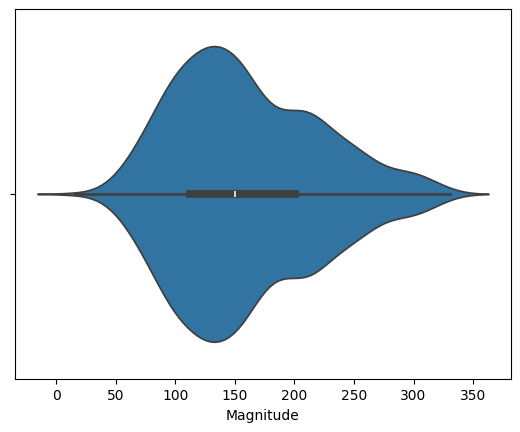

In [10]:
sns.violinplot(x = 'Magnitude', data = df)

<Axes: xlabel='Total Affected'>

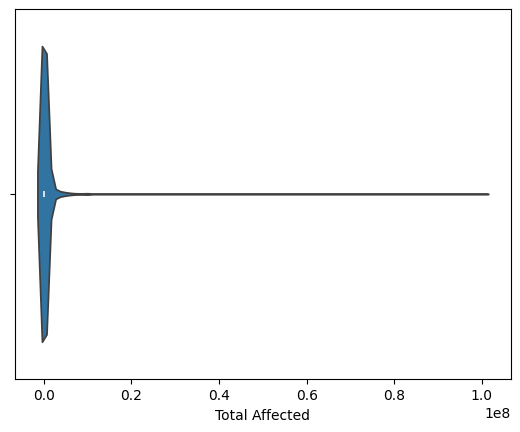

In [11]:
sns.violinplot(x = 'Total Affected', data = df)

In [12]:
df['Magnitude'] = df['Magnitude'].apply(
    lambda x: round(np.random.uniform(df['Magnitude'].min(), df['Magnitude'].max()), 1) if pd.isna(x) else x
)

In [14]:
df['Total Affected'].fillna(df['Total Affected'].mode()[0], inplace=True)
df['Location'].fillna(df['Location'].mode()[0], inplace=True)

/var/folders/0p/vdvp33851vn1jcfb8t3_kyzm0000gn/T/ipykernel_82366/1995198506.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Total Affected'].fillna(df['Total Affected'].mode()[0], inplace=True)
/var/folders/0p/vdvp33851vn1jcfb8t3_kyzm0000gn/T/ipykernel_82366/1995198506.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which w

<Axes: xlabel='Magnitude'>

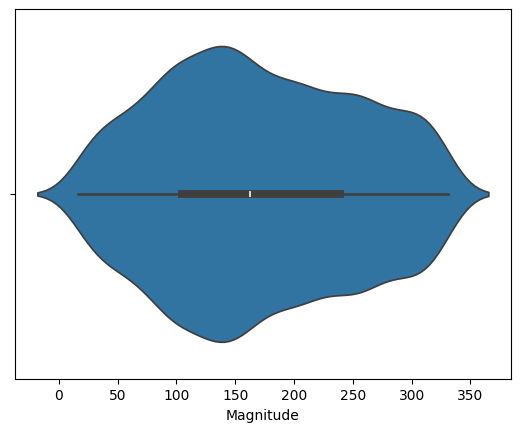

In [15]:
sns.violinplot(x = 'Magnitude', data = df)

<Axes: xlabel='Total Affected'>

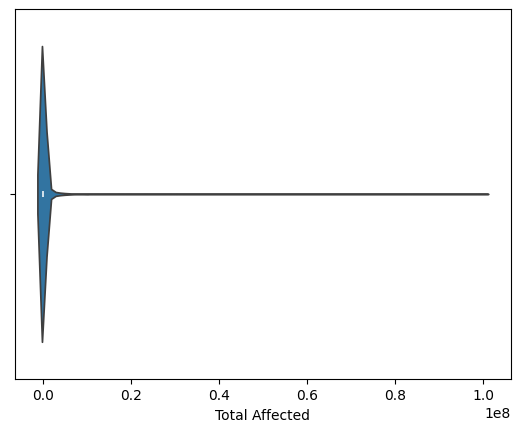

In [16]:
sns.violinplot(x = 'Total Affected', data = df)

In [17]:
df.isnull().sum()

Year              0
Disaster Type     0
Country           0
Location          0
Total Affected    0
Magnitude         0
dtype: int64

In [18]:
df.to_csv("storm_cleaned.csv", index=False)